In [1]:
%load_ext autoreload
%autoreload 2

# Analyse small-scale run to make sure sensitivity & precision are ok

# Imports

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from synbio_morpher.utils.results.analytics.naming import get_true_interaction_cols


In [5]:
# fn = '../data/ensemble_mutation_effect_analysis/2024_11_11_135219/summarise_simulation/tabulated_mutation_info.csv'
fn = '../data/ensemble_mutation_effect_analysis/2024_11_20_153740/summarise_simulation/tabulated_mutation_info.csv'
df = pd.read_csv(fn)
df

,circuit_name,mutation_name,mutation_num,mutation_type,mutation_positions,path_to_template_circuit,index,sample_num,name,interacting,...,initial_steady_states,max_amount,min_amount,overshoot,RMSE,steady_states,response_time_wrt_species-6,precision_wrt_species-6,sensitivity_wrt_species-6,sample_name
0,toy_mRNA_circuit_0,ref_circuit,0,[],[],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,399.46470,199.73235,0.533447,0.0,398.93124,0.0,1.002678,1.000000,RNA_0
1,toy_mRNA_circuit_0,ref_circuit,0,[],[],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,199.73235,199.66576,0.000000,0.0,199.66576,inf,2999.463600,0.000333,RNA_1
2,toy_mRNA_circuit_0,ref_circuit,0,[],[],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,199.73235,199.66576,0.000000,0.0,199.66576,inf,2999.463600,0.000333,RNA_2
3,toy_mRNA_circuit_0,RNA_0_m1-0,1,[6],[18],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,399.46470,199.73235,0.533447,0.0,398.93124,0.0,1.002678,1.000000,RNA_0
4,toy_mRNA_circuit_0,RNA_0_m1-0,1,[6],[18],./data/ensemble_mutation_effect_analysis/2024_...,0.0,9.0,toy_mRNA_circuit_0,[],...,199.73235,199.73235,199.66576,0.000000,0.0,199.66576,inf,2999.463600,0.000333,RNA_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,toy_mRNA_circuit_99,RNA_2_m1-0,1,[8],[9],./data/ensemble_mutation_effect_analysis/2024_...,4.0,9.0,toy_mRNA_circuit_99,[],...,199.73235,199.73235,199.66576,0.000000,0.0,199.66576,inf,2999.463600,0.000333,RNA_1
6296,toy_mRNA_circuit_99,RNA_2_m1-0,1,[8],[9],./data/ensemble_mutation_effect_analysis/2024_...,4.0,9.0,toy_mRNA_circuit_99,[],...,199.73235,199.73235,199.66576,0.000000,0.0,199.66576,inf,2999.463600,0.000333,RNA_2
6297,toy_mRNA_circuit_99,RNA_2_m1-1,1,[2],[14],./data/ensemble_mutation_effect_analysis/2024_...,5.0,9.0,toy_mRNA_circuit_99,[],...,199.73235,399.46470,199.73235,0.533447,0.0,398.93124,0.0,1.002678,1.000000,RNA_0
6298,toy_mRNA_circuit_99,RNA_2_m1-1,1,[2],[14],./data/ensemble_mutation_effect_analysis/2024_...,5.0,9.0,toy_mRNA_circuit_99,[],...,199.73235,199.73235,199.66576,0.000000,0.0,199.66576,inf,2999.463600,0.000333,RNA_1


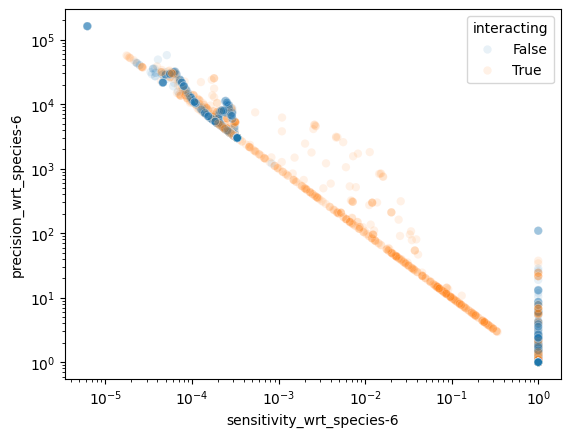

In [6]:

filt_null = df['interacting'] != '[]'
sns.scatterplot(df, x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue=filt_null, alpha=0.1)
# import matplotlib as mpl
# ax = plt.hist2d(x=np.log10(df['sensitivity_wrt_species-6']),
#            y=np.log10(df['precision_wrt_species-6']),
#            bins=50,
#            norm=mpl.colors.LogNorm())  # , cmap=mpl.cm.gray)
plt.xscale('log')
plt.yscale('log')

In [ ]:
dir_circs = os.path.join(os.path.dirname(os.path.dirname(fn)), 'mutation_effect_on_interactions_signal')

for c_name in df[filt]['circuit_name'].unique():  # [get_true_interaction_cols(df, 'energies')]
    dir_circ = os.path.join(dir_circs, c_name)
    fn_signal = os.path.join(dir_circ, 'signal_data.csv')
    # fn_steady = os.path.join(dir_circ, 'steady_states_data.csv')
    d = pd.read_csv(fn_signal)
    # d = pd.read_csv(fn_steady)
    plt.plot(d['time'], d['signal'], label=c_name)
    break
    

In [8]:
df[filt]['circuit_name'].unique()

array([], dtype=object)